# **Ejercicio de Deep Learning**

In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Cargar el conjunto de datos Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Nombres de las categorías
class_names = ['Camiseta', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo', 'Sandalia', 'Camisa', 'Zapatilla', 'Bolso', 'Bota']


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### **Normalización de los datos:**

Las imágenes digitales suelen almacenar los valores de los píxeles en un rango de 0 a 255. Este rango representa la intensidad de cada píxel en una imagen en escala de grises (0 es negro y 255 es blanco), o de cada canal de color (rojo, verde y azul) en una imagen en color.

Al dividir estos valores entre 255, se convierten en un rango de 0 a 1. Esto es útil porque las redes neuronales funcionan mejor cuando los datos de entrada están en un rango pequeño y consistente, generalmente entre 0 y 1 o -1 y 1.

In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Aplanar la imagen de 28x28
    layers.Dense(128, activation='relu'),  # Capa oculta con 128 neuronas
    layers.Dense(10, activation='softmax') # Capa de salida con 10 neuronas (una por categoría)
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
history = model.fit(train_images,
                    train_labels,
                    epochs=10,
                    validation_data=(test_images, test_labels)) #Entrenar el modelo utilizando las imágenes de entrenamiento.

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9295 - loss: 0.1894 - val_accuracy: 0.8822 - val_loss: 0.3602
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9302 - loss: 0.1840 - val_accuracy: 0.8888 - val_loss: 0.3587
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9336 - loss: 0.1789 - val_accuracy: 0.8847 - val_loss: 0.3703
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9324 - loss: 0.1786 - val_accuracy: 0.8845 - val_loss: 0.3632
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9377 - loss: 0.1694 - val_accuracy: 0.8856 - val_loss: 0.3764
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9372 - loss: 0.1648 - val_accuracy: 0.8828 - val_loss: 0.3876
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9385 - loss: 0.1630 - val_accuracy: 0.8852 - val_loss: 0.3885
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9418 - loss: 0.1557 

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Precisión en el conjunto de prueba: {test_acc:.2f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8814 - loss: 0.4024
Precisión en el conjunto de prueba: 0.88


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


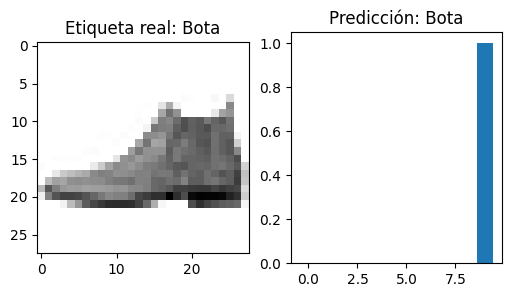

In [13]:
predictions = model.predict(test_images)

# Mostrar una imagen del conjunto de prueba y la predicción del modelo
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(test_images[0], cmap=plt.cm.binary)
plt.title(f'Etiqueta real: {class_names[test_labels[0]]}')

plt.subplot(1,2,2)
plt.bar(range(10), predictions[0])
plt.title(f'Predicción: {class_names[np.argmax(predictions[0])]}')
plt.show()


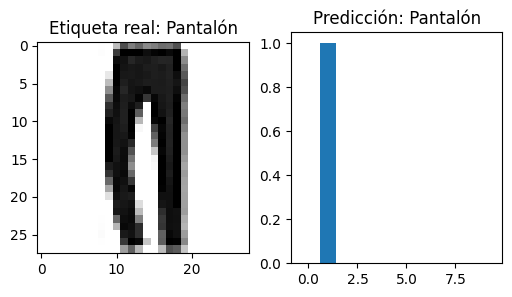

In [14]:
# Mostrar una imagen del conjunto de prueba y la predicción del modelo
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(test_images[2], cmap=plt.cm.binary)
plt.title(f'Etiqueta real: {class_names[test_labels[2]]}')

plt.subplot(1,2,2)
plt.bar(range(10), predictions[2])
plt.title(f'Predicción: {class_names[np.argmax(predictions[2])]}')
plt.show()

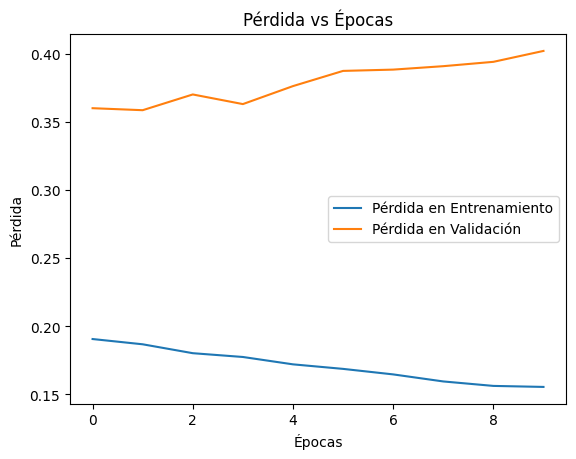

In [15]:
# Graficar la pérdida (loss) versus las épocas (epochs)
plt.plot(history.history['loss'], label='Pérdida en Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida vs Épocas')
plt.legend()
plt.show()